## Importação de bibliotecas e leitura de dataframes

In [16]:
! pip install pandas numpy seaborn matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

# Leitura das bases de dados
clientes_df = pd.read_csv("../../dataset/base_clientes.csv") 
churn_df = pd.read_csv("../../dataset/base_hist_churn.csv")
precos_df = pd.read_csv("../../dataset/base_precos.csv")

# Fusão das bases de dados
base_df = pd.merge(clientes_df, precos_df, on='id')
base_df = pd.merge(base_df, churn_df, on='id')

base_df

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07/11/2018,06/11/2022,NaN,07/11/2018,09/11/2021,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,01/01/2021,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
1,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07/11/2018,06/11/2022,NaN,07/11/2018,09/11/2021,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,01/02/2021,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
2,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07/11/2018,06/11/2022,NaN,07/11/2018,09/11/2021,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,01/03/2021,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
3,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07/11/2018,06/11/2022,NaN,07/11/2018,09/11/2021,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,01/04/2021,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
4,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07/11/2018,06/11/2022,NaN,07/11/2018,09/11/2021,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,01/05/2021,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192997,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,18/12/2015,17/12/2022,NaN,18/12/2015,21/12/2021,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,01/08/2021,0.165962,0.086905,0.000000,44.266930,0.000000,0.00000,0
192998,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,18/12/2015,17/12/2022,NaN,18/12/2015,21/12/2021,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,01/09/2021,0.165962,0.086905,0.000000,44.266930,0.000000,0.00000,0
192999,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,18/12/2015,17/12/2022,NaN,18/12/2015,21/12/2021,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,01/10/2021,0.165962,0.086905,0.000000,44.266930,0.000000,0.00000,0
193000,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,18/12/2015,17/12/2022,NaN,18/12/2015,21/12/2021,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.0,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,01/11/2021,0.165962,0.086905,0.000000,44.266930,0.000000,0.00000,0


## Construção de mapa de calor de correlação entre colunas

O mapa de calor presente na imagem a seguir relaciona seus respectivos eixos (que contêm o título de cada coluna) por meio de células com valores que variam de -1 a 1. Quanto mais próximo de -1, maior é a tendência do valor de uma coluna aumentar ao passo que o valor da outra diminui; quanto mais próximo de 1, maior é a tendência dos valores de ambas as colunas aumentarem ou diminuirem simultaneamente; no caso de valor próximo de 0, a tendência é que não exista correlação significativa entre as colunas em questão.

In [41]:
# Deleção de coluna irrelevante p/ mapa de calor
base_df.drop('campaign_disc_ele', axis=1, inplace=True)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_10384\667609011.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = base_df.corr().round(2)


<Axes: >

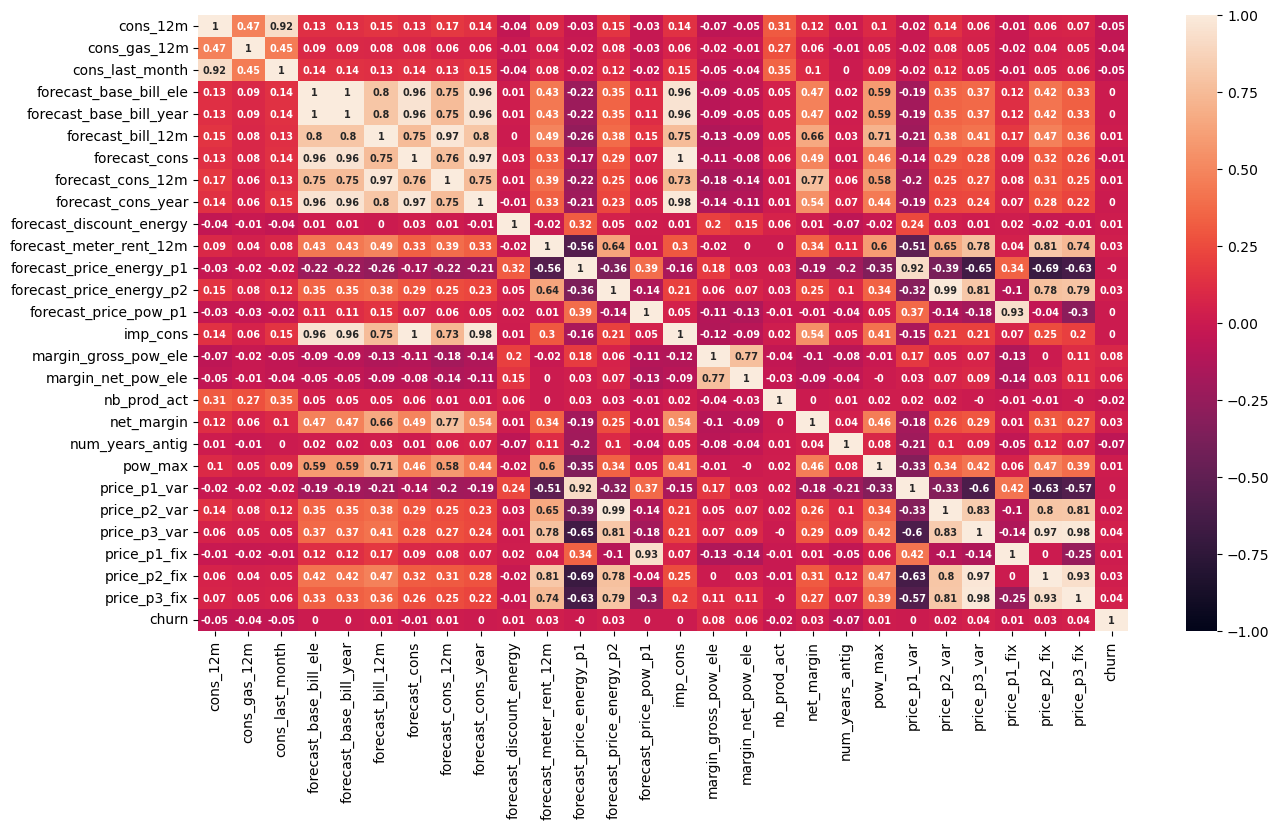

In [43]:
# Definição dos valores de correlação entre colunas arredondados para 2 casas decimais
correlacao = base_df.corr().round(2) 

# Definição do tamanho da imagem gerada p/ mapa de calor
plt.figure(figsize=(15,8))

# Geração do mapa de calor
sns.heatmap(correlacao, vmin=-1, vmax=1, annot=True,
            annot_kws={'fontsize':7, 'fontweight':'bold'})

In [4]:
base_df.isnull().sum()

id                               0
activity_new                114432
campaign_disc_ele           193002
channel_sales                50595
cons_12m                         0
cons_gas_12m                     0
cons_last_month                  0
date_activ                       0
date_end                        21
date_first_activ            150960
date_modif_prod               1875
date_renewal                   477
forecast_base_bill_ele      150960
forecast_base_bill_year     150960
forecast_bill_12m           150960
forecast_cons               150960
forecast_cons_12m                0
forecast_cons_year               0
forecast_discount_energy      1507
forecast_meter_rent_12m          0
forecast_price_energy_p1      1507
forecast_price_energy_p2      1507
forecast_price_pow_p1         1507
has_gas                          0
imp_cons                         0
margin_gross_pow_ele           156
margin_net_pow_ele             156
nb_prod_act                      0
net_margin          